In [16]:
import numpy as np
import pandas as pd
import xarray as xr
import matplotlib.pyplot as plt
import math
import glob
import cartopy.crs as ccrs
from cartopy.mpl.ticker import LongitudeFormatter, LatitudeFormatter
import cartopy.feature as cfeature
import warnings
warnings.simplefilter('ignore') # filter some warning messages

In [94]:
ddir = '../saildrone data/'
fns = glob.glob(ddir+'*.nc')
#fns

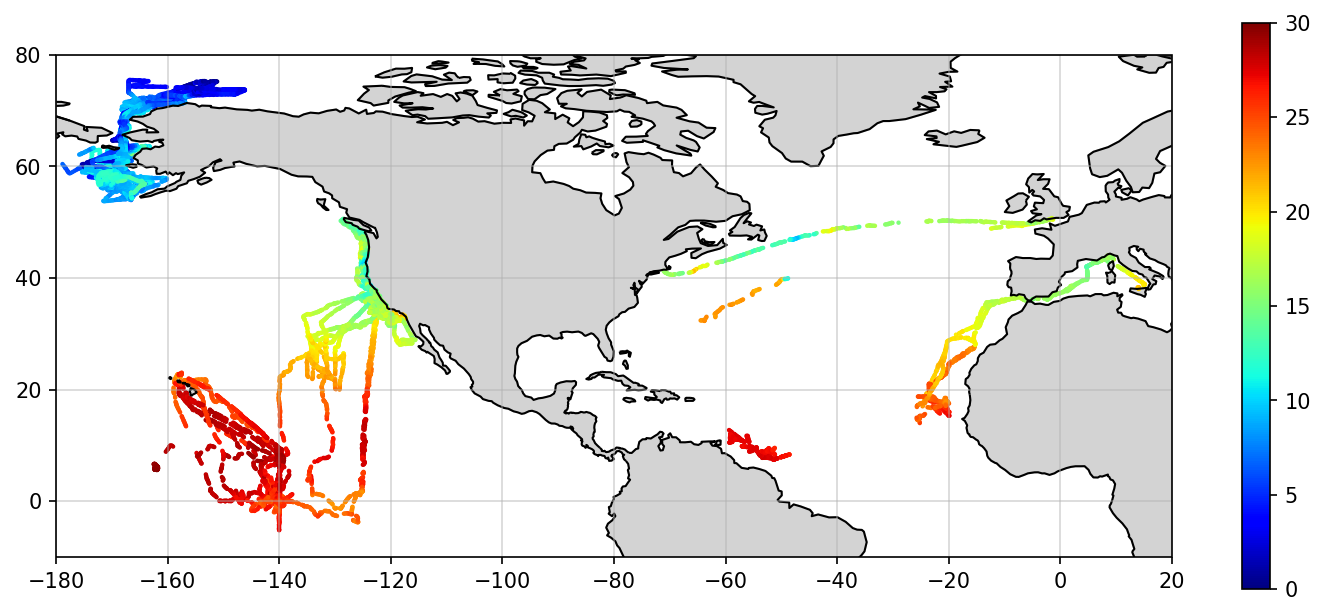

In [95]:
fig=plt.figure(figsize=(12,5),dpi=150)
ax = fig.add_subplot(1, 1, 1, projection=ccrs.PlateCarree())
ax.set_extent([-180,20,-10,80],crs=ccrs.PlateCarree())
ax.set_xticks([-180,-160,-140,-120,-100,-80,-60,-40,-20,0,20], crs=ccrs.PlateCarree())
ax.set_yticks([0,20,40,60,80], crs=ccrs.PlateCarree())
ax.coastlines()
ax.add_feature(cfeature.LAND, color='lightgrey')
    
for i in fns:
    ds = xr.open_dataset(i)
    ds.close()  
    # map
    cb = ax.scatter(ds['lon'],ds['lat'], 5,ds['TEMP_CTD_MEAN'],'.', transform=ccrs.PlateCarree(), cmap='jet', vmin=0, vmax=30)

fig.colorbar(cb)
plt.grid(zorder=0, alpha=0.5)
plt.show()

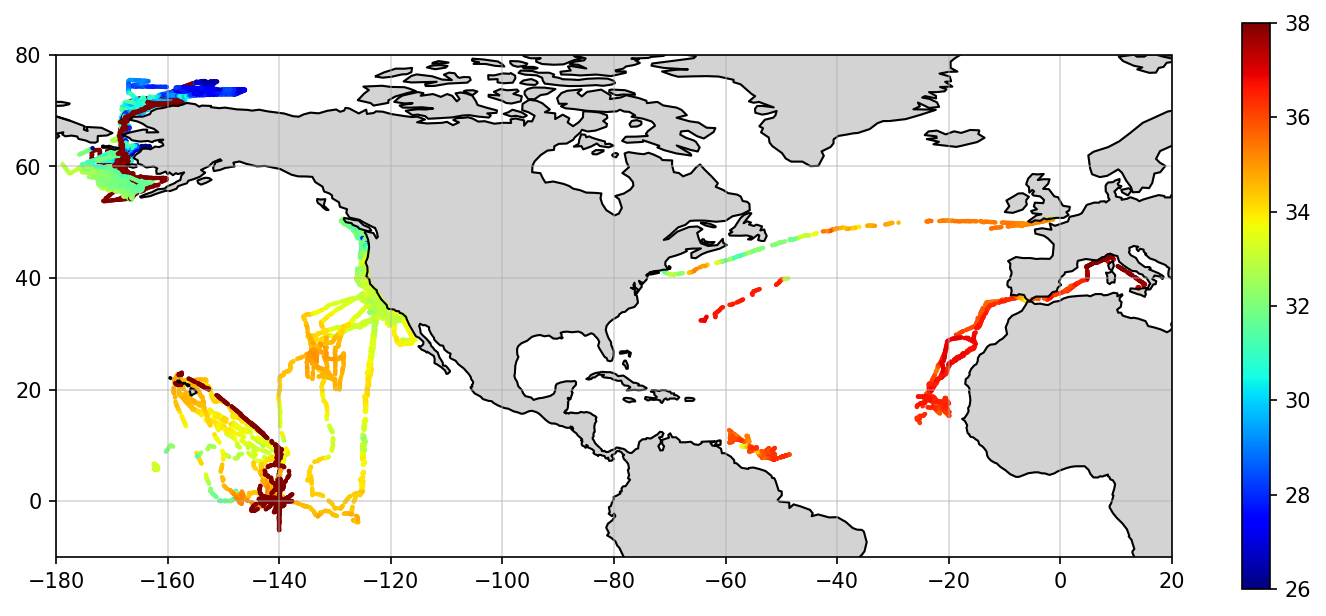

In [96]:
fig=plt.figure(figsize=(12,5),dpi=150)
ax = fig.add_subplot(1, 1, 1, projection=ccrs.PlateCarree())
ax.set_extent([-180,20,-10,80],crs=ccrs.PlateCarree())
ax.set_xticks([-180,-160,-140,-120,-100,-80,-60,-40,-20,0,20], crs=ccrs.PlateCarree())
ax.set_yticks([0,20,40,60,80], crs=ccrs.PlateCarree())
ax.coastlines()
ax.add_feature(cfeature.LAND, color='lightgrey')
    
    

for i in fns:
    ds = xr.open_dataset(i)
    ds.close()  
    # map
    cb = ax.scatter(ds['lon'],ds['lat'], 5,ds['SAL_CTD_MEAN'],'.', transform=ccrs.PlateCarree(), cmap='jet', vmin=26, vmax=38)
    #print(ds['SAL_CTD_MEAN'].min(),ds['SAL_CTD_MEAN'].max())
fig.colorbar(cb)
plt.grid(zorder=0, alpha=0.5)
plt.show()

42
42
42
42
42
42
42
42
42
42
42
42
42
42
42
42
42
42
42
42
42
42
42
42
42
42
42
42
42
42
42
42
41
42
42
42
42
42
42
42
42
42
42
41


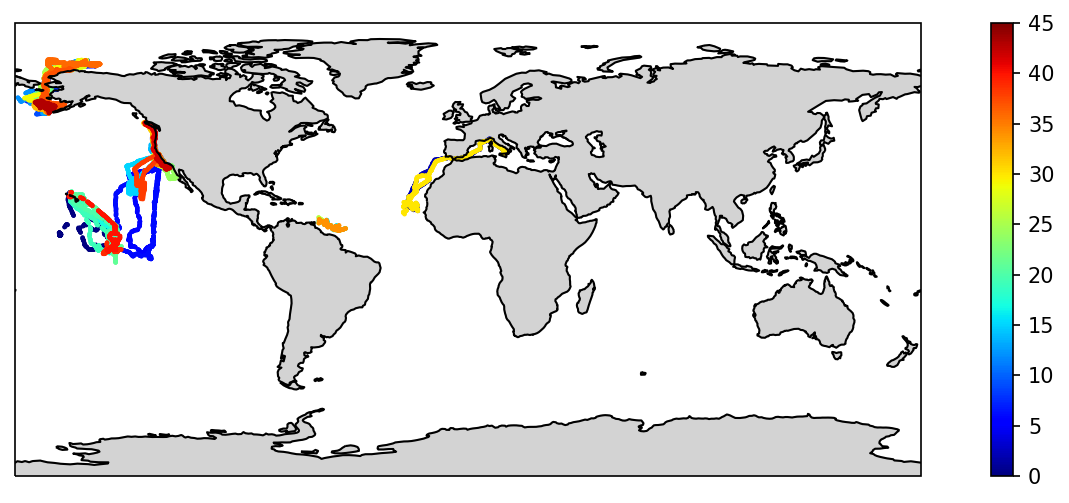

In [88]:
fig=plt.figure(figsize=(12,4),dpi=150)
ax = fig.add_subplot(1, 1, 1, projection=ccrs.PlateCarree())
ax.set_global()
ax.coastlines()
ax.add_feature(cfeature.LAND, color='lightgrey')
d=0   
for i in fns:
    ds = xr.open_dataset(i)
    ds.close()  
    # map
    cb = ax.scatter(ds['lon'],ds['lat'], 5,np.full(len(ds.lon),d),'.', transform=ccrs.PlateCarree(), cmap='jet', vmin=0, vmax=45)
    d += 1
    
    #print(len(list(ds.variables.keys())))
fig.colorbar(cb)
plt.show()

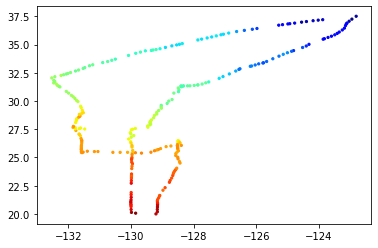

In [65]:
ds = xr.open_dataset('../saildrone data/saildrone-gen_4-shark-2018-sd1001-20180315T000000-20180529T235959-1_minutes-v1.1581626958976jplv05.0_orbitalnorep_20211116.nc')
ds.close()
plt.scatter(ds['lon'],ds['lat'], 5,ds['TEMP_CTD_MEAN'],'o', cmap='jet')

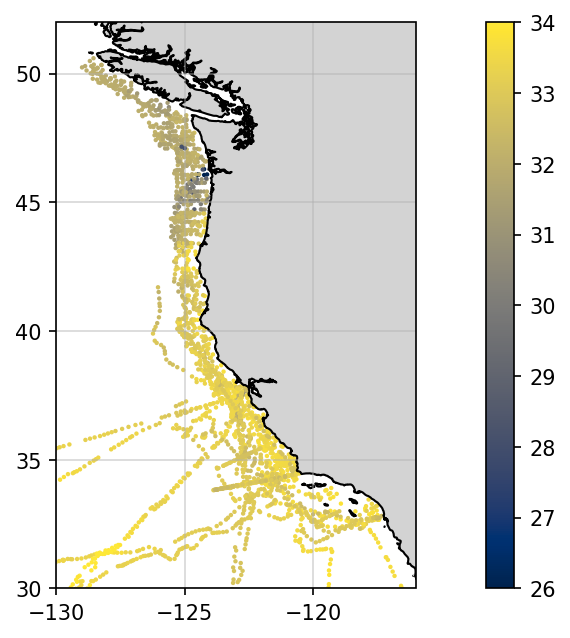

In [100]:
fig=plt.figure(figsize=(12,5),dpi=150)
ax = fig.add_subplot(1, 1, 1, projection=ccrs.PlateCarree())
ax.set_extent([-130,-116,30,52],crs=ccrs.PlateCarree())
ax.set_xticks([-130,-125,-120], crs=ccrs.PlateCarree())
ax.set_yticks([30,35,40,45,50], crs=ccrs.PlateCarree())
ax.coastlines()
ax.add_feature(cfeature.LAND, color='lightgrey')
    
for i in fns:
    ds = xr.open_dataset(i)
    ds.close()  
    # map
    cb = ax.scatter(ds['lon'],ds['lat'], 5,ds['SAL_CTD_MEAN'],'.', transform=ccrs.PlateCarree(), cmap='jet', vmin=26, vmax=34)
    #print(ds['SAL_CTD_MEAN'].min(),ds['SAL_CTD_MEAN'].max())
fig.colorbar(cb)
plt.grid(zorder=0, alpha=0.5)
plt.show()

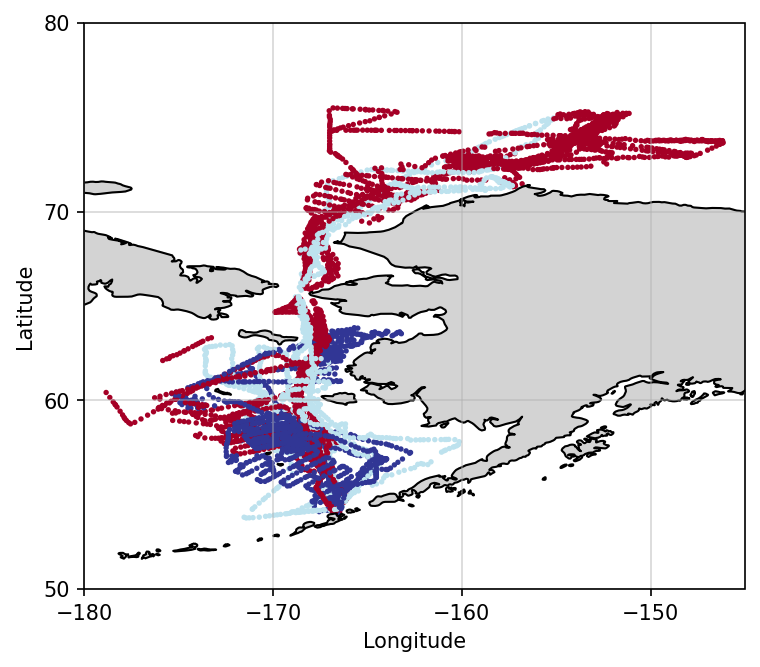

In [110]:
fig=plt.figure(figsize=(12,5),dpi=150)
ax = fig.add_subplot(1, 1, 1, projection=ccrs.PlateCarree())
ax.set_extent([-180,-145,50,80],crs=ccrs.PlateCarree())
ax.set_xticks([-180,-170,-160, -150], crs=ccrs.PlateCarree())
ax.set_yticks([50,60,70,80], crs=ccrs.PlateCarree())
ax.coastlines()
ax.add_feature(cfeature.LAND, color='lightgrey')
    
for i in fns:
    ds = xr.open_dataset(i)
    ds.close()  
    # map
    cb = ax.scatter(ds['lon'],ds['lat'], 10,ds.time.dt.year,'.', transform=ccrs.PlateCarree(), cmap='RdYlBu_r', vmin=2016, vmax=2019)
    #print(ds['SAL_CTD_MEAN'].min(),ds['SAL_CTD_MEAN'].max())
#cb2 = fig.colorbar(cb)
#cb2.set_label('SST (C)')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.grid(zorder=0, alpha=0.5)
plt.show()

In [111]:
ds

<xarray.Dataset>
Dimensions:                       (time: 369)
Coordinates:
  * time                          (time) datetime64[ns] 2016-05-25T18:56:45 ....
    ob                            (time) int64 ...
Data variables: (12/39)
    lat                           (time) float64 54.33 54.59 ... 54.33 54.26
    lon                           (time) float64 -166.5 -166.4 ... -166.4 -166.4
    COG_MEAN                      (time) float64 ...
    PITCH_MEAN                    (time) float64 ...
    ROLL_MEAN                     (time) float64 ...
    HDG_MEAN                      (time) float64 ...
    ...                            ...
    smap_rev_number               (time) float64 ...
    dist_land                     (time) float64 ...
    analysed_sst                  (time) float64 ...
    analysis_error                (time) float64 ...
    mask                          (time) float64 ...
    sea_ice_fraction              (time) float64 ...
Attributes:
    history:      FERRET V7.3  20-Dec-17
    Conventions:  CF-1.6
    featureType:  trajectory
    project:      PMEL_Arctic_2016
    vehicle_id:   sd126